In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\PC\Desktop\Business Intelligence\adult\adult.data", header=None, sep=", ", engine="python")

In [7]:
df.columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
]

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df.isin(["?"]).sum()
missing_table = df.isnull().sum().reset_index()
missing_table.columns = ["Attribute", "Missing_Count"]

missing_table["Missing_Percentage"] = (
    missing_table["Missing_Count"] / len(df)
) * 100

missing_table

,Attribute,Missing_Count,Missing_Percentage
0,age,0,0.000000
1,workclass,1836,5.638647
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education_num,0,0.000000
5,marital_status,0,0.000000
6,occupation,1843,5.660146
7,relationship,0,0.000000
8,race,0,0.000000
9,sex,0,0.000000


In [18]:
import numpy as np

df.replace("?", np.nan, inplace=True)

In [19]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [20]:
df_clean = df.dropna()

In [21]:
print("Original rows:", len(df))
print("Rows after cleaning:", len(df_clean))
print("Rows removed:", len(df) - len(df_clean))

Original rows: 32561
Rows after cleaning: 30162
Rows removed: 2399


In [22]:
df_clean.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [23]:
#checking for inconsistent category labels
category_summary = []

categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    category_summary.append({
        "Attribute": col,
        "Unique_Values": df[col].nunique()
    })

category_table = pd.DataFrame(category_summary)
category_table

,Attribute,Unique_Values
0,workclass,8
1,education,16
2,marital_status,7
3,occupation,14
4,relationship,6
5,race,5
6,sex,2
7,native_country,41
8,income,2


In [24]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [25]:
category_summary = []

for col in categorical_cols:
    category_summary.append({
        "Attribute": col,
        "Unique_Values": df[col].nunique()
    })

pd.DataFrame(category_summary)
#Several categorical attributes contained inconsistent labels caused by leading and trailing whitespace. These inconsistencies were identified by examining unique category values (Table X). To correct this, whitespace was removed from all categorical attributes using string standardization, resulting in a reduced and consistent set of category labels

,Attribute,Unique_Values
0,workclass,8
1,education,16
2,marital_status,7
3,occupation,14
4,relationship,6
5,race,5
6,sex,2
7,native_country,41
8,income,2


In [26]:
df["native_country"].value_counts().head(10)

native_country
United-States    29170
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
England             90
Name: count, dtype: int64

In [27]:
#checking for duplicates
duplicate_table = pd.DataFrame({
    "Total_Records": [len(df)],
    "Duplicate_Records": [df.duplicated().sum()]
})

duplicate_table

,Total_Records,Duplicate_Records
0,32561,24


In [28]:
df_clean = df_clean.drop_duplicates()
print("Records before duplicate removal:", len(df))
print("Records after duplicate removal:", len(df_clean))
print("Duplicates removed:", 24)

Records before duplicate removal: 32561
Records after duplicate removal: 30139
Duplicates removed: 24


In [29]:
#checking for redundancy
df[["education", "education_num"]].drop_duplicates().sort_values("education_num")

,education,education_num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


In [30]:
df_clean = df_clean.drop(columns=["education"])
df_clean.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [39]:
df_clean.info()
print(df_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education_num   30139 non-null  int64 
 4   marital_status  30139 non-null  object
 5   occupation      30139 non-null  object
 6   relationship    30139 non-null  object
 7   race            30139 non-null  object
 8   sex             30139 non-null  object
 9   capital_gain    30139 non-null  int64 
 10  capital_loss    30139 non-null  int64 
 11  hours_per_week  30139 non-null  int64 
 12  native_country  30139 non-null  object
 13  income          30139 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB
(30139, 14)


In [32]:
#Following the identification and correction of data quality issues, the dataset was validated to ensure completeness and consistency. The final cleaned dataset consists of 30,139 records across 14 attributes, with no missing values, no duplicate entries, and no redundant variables

In [40]:
df_encoded = pd.get_dummies(
    df_clean,
    columns=[
        "workclass", "marital_status", "occupation", "relationship",
        "race", "sex", "native_country"
    ],
    drop_first=True  # removes first category to avoid multicollinearity
)

In [41]:
print(df_encoded.shape)       # rows unchanged, columns increase
print(df_encoded.head())      # see the first few rows

(30139, 82)
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  ...  \
0  <=50K                False              False                   False  ...   
1  <=50K                False              False                   False  ...   
2  <=50K                False               True                   False  ...   
3  <=50K                False               True                   False  ...   
4  <=50K                False               True                   False  ...   

   native_country_Portugal  native_cou

In [ ]:
# df_clean is the name of the cleaned data set

### Justification for Cleaning Steps

1. **Standardising categorical labels**  
   Leading and trailing whitespace was removed from all categorical columns.  
   *Reason:* This ensures that categories like `"Private"` and `" Private"` are treated as the same, preventing inflated category counts.

2. **Handling missing values**  
   Missing values encoded as `"?"` were replaced with `NaN` and rows containing missing values were removed.  
   *Reason:* This maintains data integrity and avoids bias; missingness was low, so row removal is safe.

3. **Removing duplicates**  
   Exact duplicate rows were dropped.  
   *Reason:* Duplicates distort frequency counts and statistical analysis.

4. **Removing redundant variables**  
   The `education` column was dropped because `education_num` provides the same information in numeric form.  
   *Reason:* Reduces redundancy and preserves ordinal encoding for analysis.

5. **Encoding categorical variables**  
   One-hot encoding was applied to nominal categorical attributes.  
   *Reason:* Numeric encoding is required for BI modelling; `drop_first=True` prevents multicollinearity.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd


In [7]:
df = pd.read_csv('adult_cleaned.csv')

In [8]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

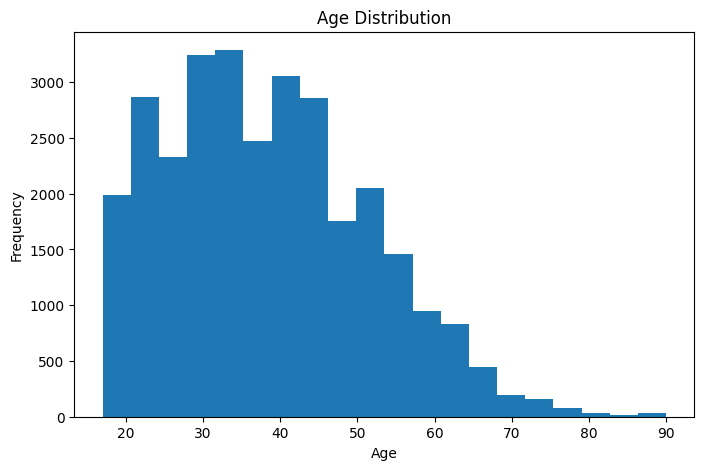

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('adult_cleaned.csv')

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

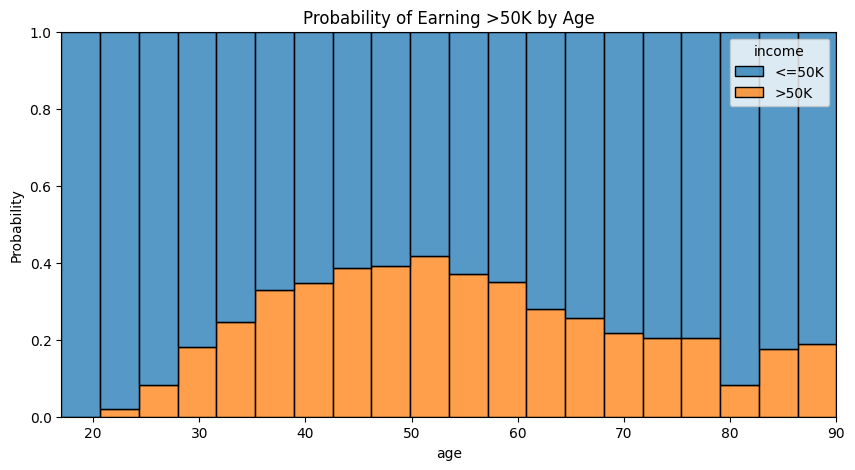

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='income', multiple='fill', stat='probability', bins=20)
plt.title('Probability of Earning >50K by Age')
plt.ylabel('Probability')
plt.show()

In [11]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [12]:
# Create the binary column 'is_high_income'
# It checks if the 'income' column (after removing whitespace) is '>50K'
# .astype(int) converts the True/False result to 1/0
df['is_high_income'] = (df['income'].str.strip() == '>50K').astype(int)

# Optional: Check the first few rows to confirm the new column was created correctly
print(df[['income', 'is_high_income']].head())

  income  is_high_income
0  <=50K               0
1  <=50K               0
2  <=50K               0
3  <=50K               0
4  <=50K               0


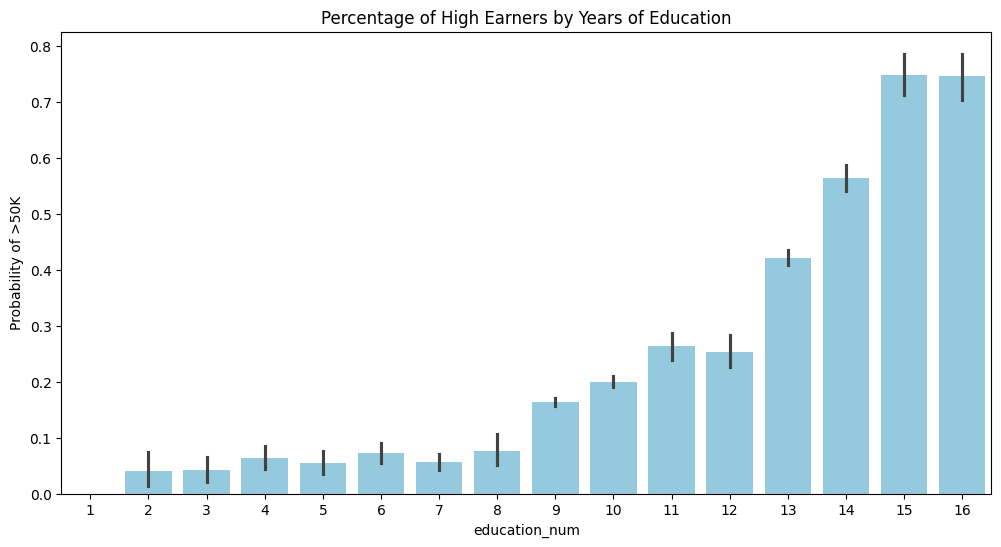

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='education_num', y='is_high_income', data=df, color='skyblue')
plt.title('Percentage of High Earners by Years of Education')
plt.ylabel('Probability of >50K')
plt.show()

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_8040\193513256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_high_income', y='workclass', data=df, order=order, palette='viridis')


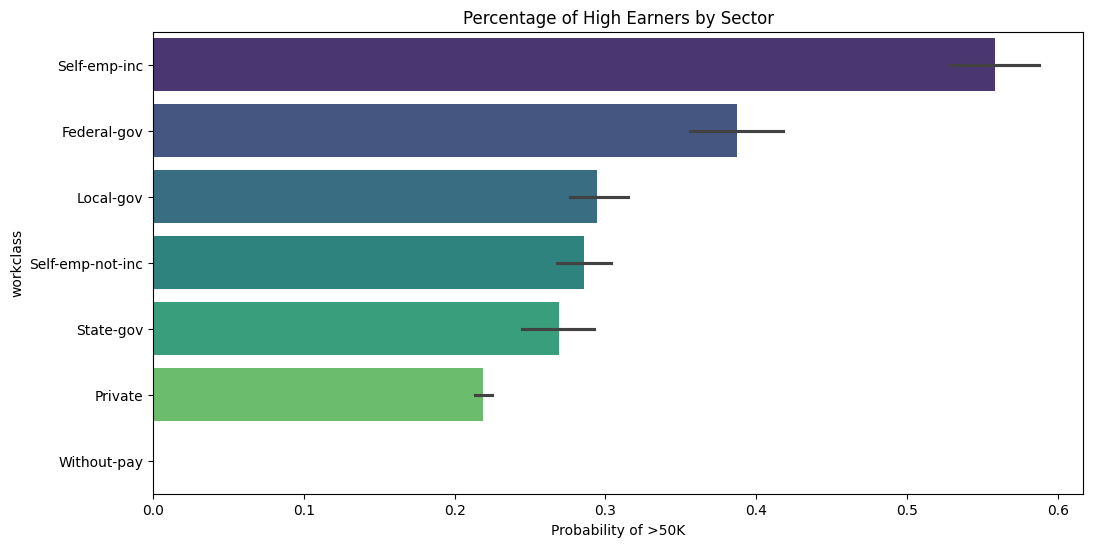

In [14]:
plt.figure(figsize=(12, 6))
order = df.groupby('workclass')['is_high_income'].mean().sort_values(ascending=False).index
sns.barplot(x='is_high_income', y='workclass', data=df, order=order, palette='viridis')
plt.title('Percentage of High Earners by Sector')
plt.xlabel('Probability of >50K')
plt.show()

In [11]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('adult_cleaned.csv')

# Create binary target
df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [12]:
from sklearn.model_selection import train_test_split

# Keep sensitive attributes separately for later fairness checks
original_data = df[['sex', 'race', 'income_numeric']].copy()

# Prepare features (exclude target & sensitive attributes)
X = pd.get_dummies(
    df.drop(columns=['income', 'income_numeric', 'sex', 'race']),
    drop_first=True
)
y = df['income_numeric']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(
        solver='liblinear', max_iter=1000, random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, class_weight='balanced',
        random_state=42, n_jobs=-1
    )
}

for model in models.values():
    model.fit(X_train, y_train)

In [14]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

print('--- Model Performance Results ---')

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f'\n{name}')
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('AUC:', roc_auc_score(y_test, y_proba))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))

--- Model Performance Results ---

Logistic Regression
Confusion Matrix: [[6563  227]
 [1647  605]]
AUC: 0.5823335565571562
Precision: 0.7271634615384616
Recall: 0.26865008880994673
F1 Score: 0.39234760051880674

Random Forest
Confusion Matrix: [[6328  462]
 [ 861 1391]]
AUC: 0.9025287618663954
Precision: 0.7506745817593092
Recall: 0.6176731793960923
F1 Score: 0.6777101096224117


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


rf_model = models['Random Forest']
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_20_features = feature_importances.nlargest(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='viridis')
plt.title('Top 20 Feature Importance for Income Prediction (Random Forest)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance_chart.png')
plt.clf()

print("Member 2: Feature Importance Chart generated: 'feature_importance_chart.png'")

C:\Users\USER\AppData\Local\Temp\ipykernel_23220\1752509901.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='viridis')


Member 2: Feature Importance Chart generated: 'feature_importance_chart.png'


<Figure size 1000x800 with 0 Axes>

In [16]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Prepare Fairness DataFrame
test_indices = y_test.index
fairness_df = original_data.loc[test_indices].copy()
rf_model = models['Random Forest']
rf_y_pred = rf_model.predict(X_test)
fairness_df['RF_Prediction'] = rf_y_pred

# Function to calculate FNR (False Negative Rate)
def calculate_fairness_metrics(group_df, group_name):
    cm = confusion_matrix(group_df['income_numeric'], group_df['RF_Prediction'])
    fn = cm[1, 0]  # False Negatives are in the bottom-left corner
    total_positives = cm[1, 0] + cm[1, 1] # Sum of False Negatives and True Positives
    fnr = fn / total_positives if total_positives > 0 else 0
    return {
        'Group': group_name,
        'Total Actual Positives': total_positives,
        'False Negatives (FN)': fn,
        'False Negative Rate (FNR)': f"{fnr:.4f}"
    }

# Gender-based fairness analysis
gender_results = [
    calculate_fairness_metrics(fairness_df[fairness_df['sex'] == sex], sex)
    for sex in fairness_df['sex'].unique()
]
gender_fairness_df = pd.DataFrame(gender_results).sort_values(
    by='False Negative Rate (FNR)', ascending=False
)
gender_fairness_df.to_csv('gender_fairness_analysis.csv', index=False)

# Race-based fairness analysis (Focusing on majority groups)
major_races = ['White', 'Black']
race_results = [
    calculate_fairness_metrics(fairness_df[fairness_df['race'] == race], race)
    for race in major_races
]
race_fairness_df = pd.DataFrame(race_results).sort_values(
    by='False Negative Rate (FNR)', ascending=False
)
race_fairness_df.to_csv('race_fairness_analysis.csv', index=False)

print("Member 3: Fairness analysis CSVs generated: 'gender_fairness_analysis.csv' and 'race_fairness_analysis.csv'")

Member 3: Fairness analysis CSVs generated: 'gender_fairness_analysis.csv' and 'race_fairness_analysis.csv'
